<a href="https://colab.research.google.com/github/FaisalAhmedBijoy/Deep-CNN-Architecture-Implementation/blob/main/Experiment_Thesis_Image_Classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

In [39]:
print('Current working directory: ',os.getcwd())

Current working directory:  /content


## Setup Dataset Path 

In [40]:
'''
building_house=glob.glob('dataset_building/building_house/*.*')
mosque=glob.glob('dataset_building/mosque/*.*')
temple=glob.glob('dataset_building/temple/*.*')
tinshed=glob.glob('dataset_building/tinshed/*.*')
sky_building=glob.glob('dataset_building/sky_building/*.*')
mud_house=glob.glob('dataset_building/mud_house/*.*')
'''


"\nbuilding_house=glob.glob('dataset_building/building_house/*.*')\nmosque=glob.glob('dataset_building/mosque/*.*')\ntemple=glob.glob('dataset_building/temple/*.*')\ntinshed=glob.glob('dataset_building/tinshed/*.*')\nsky_building=glob.glob('dataset_building/sky_building/*.*')\nmud_house=glob.glob('dataset_building/mud_house/*.*')\n"

In [41]:
''' 
print('Building house data : ',len(building_house))
print('Mosque data: ',len(mosque))
print('Temple data: ',len(temple))
print('Tinshed data: ',len(tinshed))
print('Sky building data: ',len(sky_building))
print('Mud house data: ',len(mud_house))
'''


" \nprint('Building house data : ',len(building_house))\nprint('Mosque data: ',len(mosque))\nprint('Temple data: ',len(temple))\nprint('Tinshed data: ',len(tinshed))\nprint('Sky building data: ',len(sky_building))\nprint('Mud house data: ',len(mud_house))\n"

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
train_path='/content/drive/My Drive/CSE 4000 Thesis/Dataset1500/train'
test_path='/content/drive/My Drive/CSE 4000 Thesis/Dataset1500/test'
print(os.listdir(train_path))
print(os.listdir(test_path))

['building_house', 'mosque', 'temple', 'tinshed', 'mud_house', 'sky_building']
['mud_house', 'building_house', 'mosque', 'sky_building', 'temple', 'tinshed']


## Dataset Preprocssing using ImageDataGenerator

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [45]:
WIDTH=224
HEIGHT=224

In [46]:
train_generator = ImageDataGenerator(rescale=1./255,
                                    horizontal_flip=True,
                                    shear_range=0.1 ,
                                    zoom_range=0.1,
                                    rotation_range=10,
                                    height_shift_range=0.1,
                                    fill_mode='nearest',
                                    validation_split=0.2)
                                     
train_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                              
                                                 target_size=(WIDTH, HEIGHT),
                                                 class_mode='categorical',
                                                 subset='training')

validation_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical',
                                                 subset='validation')

Found 960 images belonging to 6 classes.
Found 240 images belonging to 6 classes.


In [47]:
test_generator=ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory(batch_size=32,
                                                 directory=test_path,
                                                 shuffle=True,
                                               
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical')

Found 300 images belonging to 6 classes.


In [48]:
train_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [49]:
validation_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [50]:
total_class=len(train_dataset.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  6


## Plot some random image
- class 0: building house
- class 1: mosque
- class 2: mud house
- class 3: sky building
- class 4: temple
- class 5: tinshed

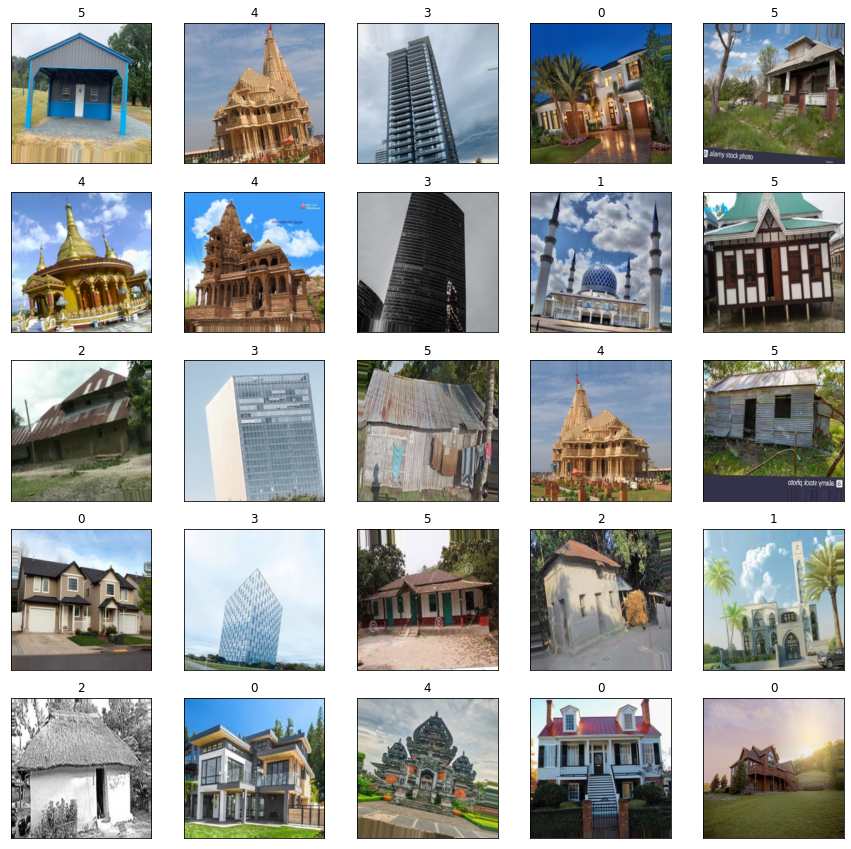

In [51]:
x,y=train_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

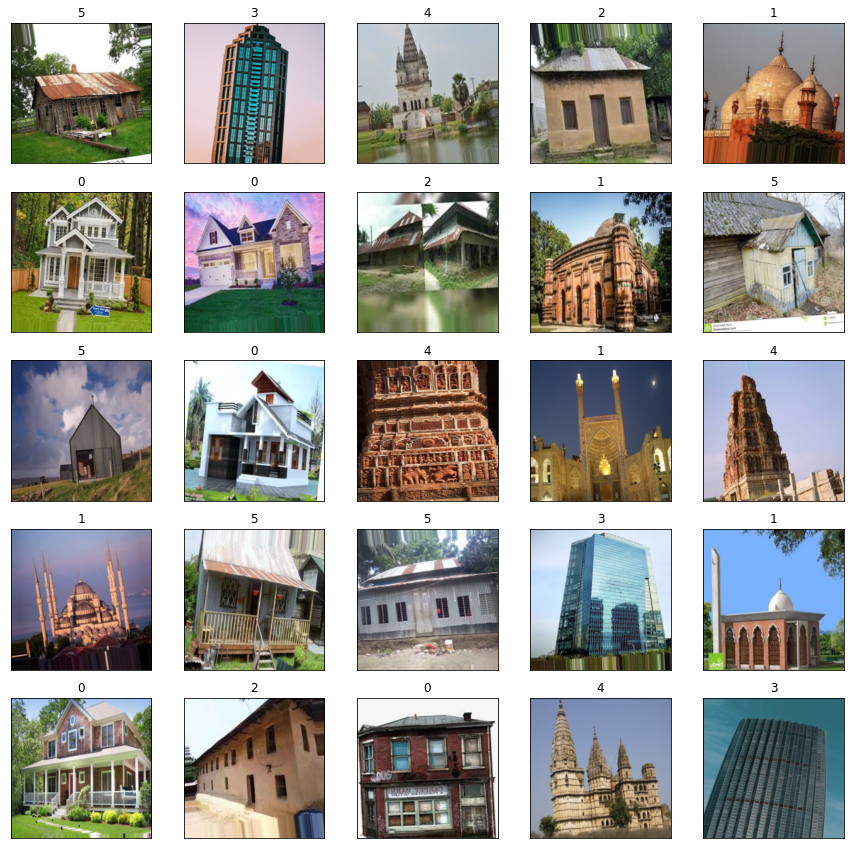

In [52]:
x,y=validation_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Configure the dataset for perfomance

In [53]:
"""
train_ds = train_dataset.prefetch(buffer_size=32)
val_ds = validation_dataet.prefetch(buffer_size=32)
"""

'\ntrain_ds = train_dataset.prefetch(buffer_size=32)\nval_ds = validation_dataet.prefetch(buffer_size=32)\n'

## Define Convolutional Neural Network Architecture

In [54]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np

In [55]:
inputs = keras.Input(shape=(224,224,3))

x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(64, 3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

previous_block_activation = x  # Set aside residual



In [56]:
for size in [128, 256, 512, 728]:
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)

    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)

    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
    residual = layers.Conv2D(size, 1, strides=2, padding="same")(previous_block_activation)
    x = layers.add([x, residual])  # Add back residual
    previous_block_activation = x  # Set aside next residual

    

In [57]:
num_classes=6

In [58]:
x = layers.SeparableConv2D(1024, 3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.GlobalAveragePooling2D()(x)
if num_classes == 2:
    activation = "sigmoid"
    units = 1
else:
    activation = "softmax"
    units = num_classes

x = layers.Dropout(0.5)(x)
outputs = layers.Dense(units, activation=activation)(x)

## Create Model

In [59]:
model=keras.Model(inputs,outputs,name='classifier')

In [60]:
model.summary()

Model: "classifier"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 112, 112, 32) 896         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_9 (BatchNor (None, 112, 112, 32) 128         conv2d_5[0][0]                   
__________________________________________________________________________________________________
activation_9 (Activation)       (None, 112, 112, 32) 0           batch_normalization_9[0][0]      
_________________________________________________________________________________________

/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/CNN1625284030.png


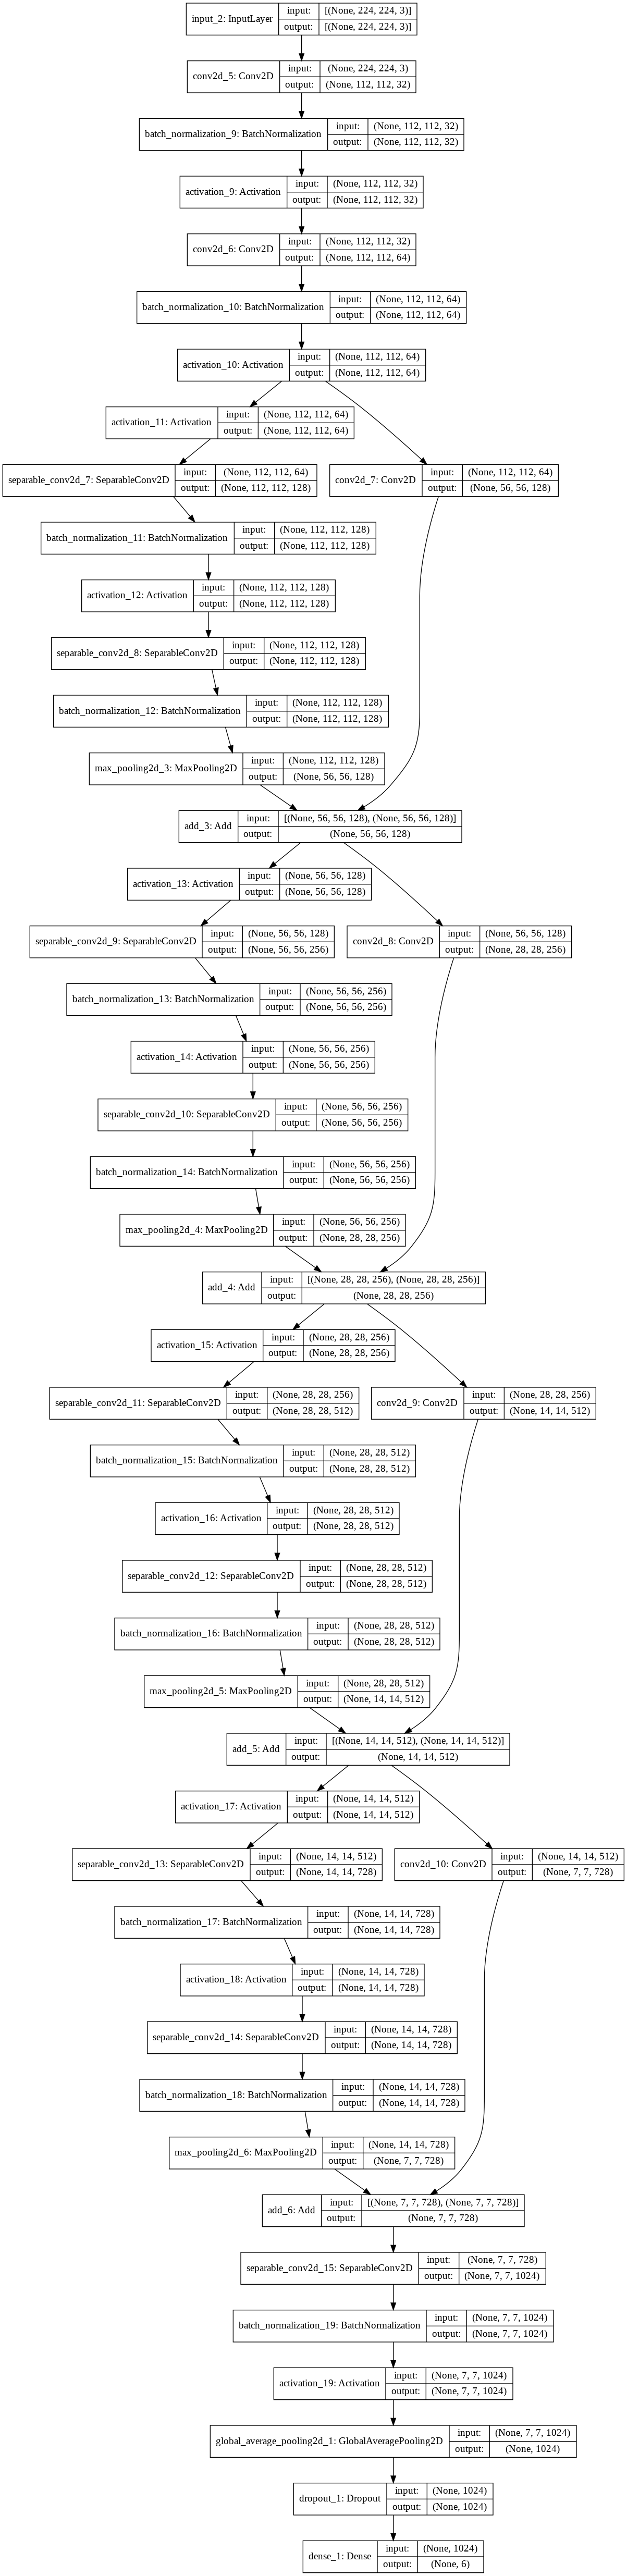

In [61]:
import time
t=time.time()
image_name='/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/CNN'+str(int(t))+'.png'
print(image_name)
keras.utils.plot_model(model,show_shapes=True,to_file=image_name)

## Compile CNN Model

In [62]:
model.compile(loss='categorical_crossentropy' ,
              optimizer='adam' ,
              metrics=['accuracy',
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall(),
                       tf.keras.metrics.AUC()])

## Trained  CNN Model

In [63]:
epochs=200
batch_size=32
trainset_length=len(train_dataset.labels)
validation_length=len(validation_dataset.labels)
steps_per_epoch=(trainset_length//batch_size)
validation_steps=(validation_length//batch_size)
print(trainset_length)
print(validation_length)
print(steps_per_epoch)
print(validation_steps)

960
240
30
7


In [64]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/buildingThesis.model.best.hdf5', verbose=1 ,save_best_only=True)

In [65]:
history = model.fit(train_dataset,
                    steps_per_epoch = steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_dataset,
                    validation_steps=validation_steps,
                    callbacks=[checkpointer])

Epoch 1/200
30/30 [==============================] - 21s 626ms/step - loss: 1.4220 - accuracy: 0.4563 - precision_1: 0.5417 - recall_1: 0.3042 - auc_1: 0.8020 - val_loss: 1.7957 - val_accuracy: 0.1652 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_auc_1: 0.5054

Epoch 00001: val_loss improved from inf to 1.79573, saving model to /content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/buildingThesis.model.best.hdf5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/200
30/30 [==============================] - 18s 598ms/step - loss: 1.0903 - accuracy: 0.5635 - precision_1: 0.6590 - recall_1: 0.4469 - auc_1: 0.8815 - val_loss: 1.8354 - val_accuracy: 0.1696 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_auc_1: 0.5147

Epoch 00002: val_loss did not improve from 1.79573
Epoch 3/200
30/30 [==============================] - 18s 601ms/step - loss: 0.9577 - accuracy: 0.6448 - precision_1: 0.7086 - recall_1: 0.5521 - auc_1: 0.9088 - val_loss: 1.9061 - val_accuracy: 0.1696 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_auc_1: 0.5223

Epoch 00003: val_loss did not improve from 1.79573
Epoch 4/200
30/30 [==============================] - 18s 596ms/step - loss: 0.8648 - accuracy: 0.6687 - precision_1: 0.7357 - recall_1: 0.5885 - auc_1: 0.9246 - val_loss: 2.0209 - val_accuracy: 0.1607 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_auc_1: 0.5273

Epoch 00004: val_loss did not improve from 1.79573
Epoch 5/20

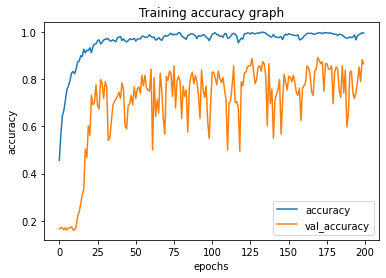

In [66]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

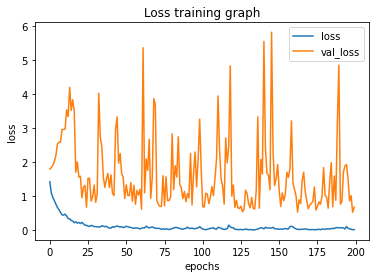

In [67]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

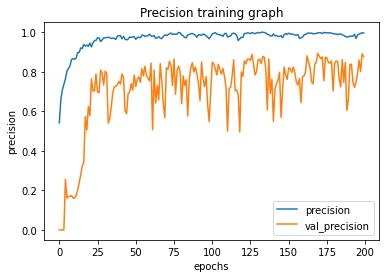

In [71]:
plt.xlabel('epochs')
plt.ylabel('precision')
plt.title('Precision training graph')
plt.plot(history.history['precision_1'],label='precision')
plt.plot(history.history['val_precision_1'],label='val_precision')
plt.legend()
plt.show()

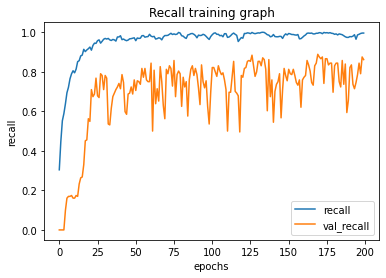

In [72]:
plt.xlabel('epochs')
plt.ylabel('recall')
plt.title('Recall training graph')
plt.plot(history.history['recall_1'],label='recall')
plt.plot(history.history['val_recall_1'],label='val_recall')
plt.legend()
plt.show()

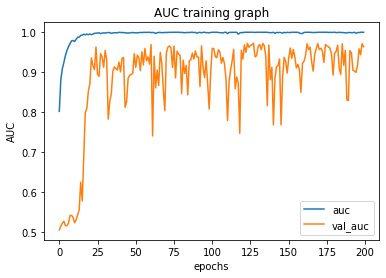

In [73]:
plt.xlabel('epochs')
plt.ylabel('AUC')
plt.title('AUC training graph')
plt.plot(history.history['auc_1'],label='auc')
plt.plot(history.history['val_auc_1'],label='val_auc')
plt.legend()
plt.show()

## Testing the model

In [69]:
test_loss,test_accuracy,test_precision,test_recall,test_auc=model.evaluate(test_dataset)

10/10 [==============================] - 1s 138ms/step - loss: 0.7094 - accuracy: 0.8467 - precision_1: 0.8462 - recall_1: 0.8433 - auc_1: 0.9631


In [70]:
print('Accuracy of the model is : ',test_accuracy*100)
print('Loss of the model is : ',test_loss)
print('Precision of the model is : ',test_precision*100)
print('Recall of the model is : ',test_recall*100)
print('AUC of the model is : ',test_auc*100)

Accuracy of the model is :  84.6666693687439
Loss of the model is :  0.7093798518180847
Precision of the model is :  84.61538553237915
Recall of the model is :  84.33333039283752
AUC of the model is :  96.3127851486206


In [77]:
f1score=(2*test_precision*test_recall)/ (test_precision+test_recall)
print("F1 score: ",f1score*100)

F1 score:  84.47412252103867


## Model Evaluation Check the Image 

## Plot some random image
- class 0: building house
- class 1: mosque
- class 2: mud house
- class 3: sky building
- class 4: temple
- class 5: tinshed

In [78]:
from tensorflow.keras.preprocessing import image

(1, 224, 224, 3)
[[9.9997103e-01 2.4995504e-07 9.9245345e-10 1.3959060e-05 1.2270864e-08
  1.4738239e-05]]
0


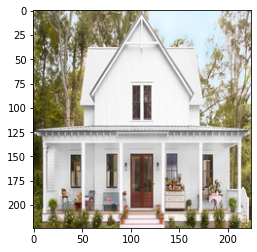

In [79]:
image_path='/content/drive/MyDrive/CSE 4000 Thesis/Dataset1500/Images/building_house5.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[2.4818568e-17 1.0000000e+00 8.6288824e-19 2.5919094e-18 4.5721122e-12
  1.5113357e-16]]
1


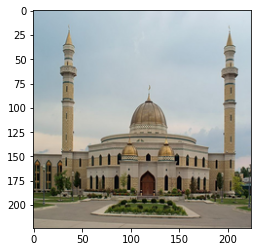

In [80]:
image_path='/content/drive/MyDrive/CSE 4000 Thesis/Dataset1500/Images/mosque0.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[1.5430369e-06 9.7134084e-01 4.2758651e-13 1.2931436e-07 2.8657615e-02
  4.1297210e-09]]
1


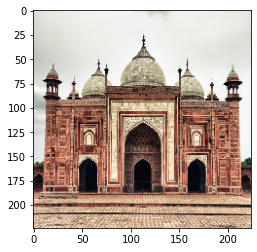

In [81]:
image_path='/content/drive/MyDrive/CSE 4000 Thesis/Dataset1500/Images/mosque35.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[3.3387947e-12 3.9666510e-11 1.0000000e+00 1.1231122e-16 3.8515462e-11
  1.7439713e-13]]
2


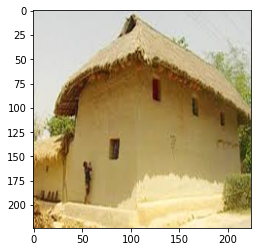

In [82]:
image_path='/content/drive/MyDrive/CSE 4000 Thesis/Dataset1500/Images/mud72.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[2.8351328e-09 4.7311165e-11 1.5160385e-09 1.0000000e+00 1.3188596e-08
  1.0096239e-09]]
3


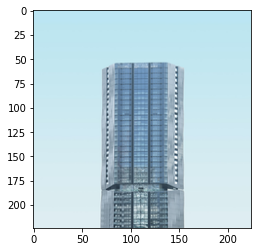

In [83]:
image_path='/content/drive/MyDrive/CSE 4000 Thesis/Dataset1500/Images/sky79.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[9.3989483e-09 1.2796700e-07 1.7775599e-10 1.9100904e-10 9.9999988e-01
  1.1832332e-08]]
4


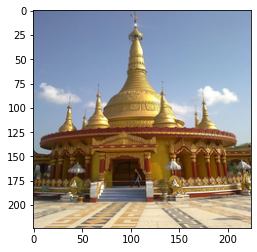

In [84]:
image_path='/content/drive/MyDrive/CSE 4000 Thesis/Dataset1500/Images/temple33.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[8.17762775e-05 1.00537426e-10 1.46993667e-11 7.08504729e-07
  6.85901266e-11 9.99917507e-01]]
5


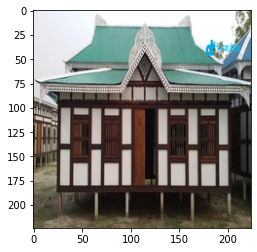

In [85]:
image_path='/content/drive/MyDrive/CSE 4000 Thesis/Dataset1500/Images/tinshed25.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[4.5038745e-02 6.2768408e-06 4.3196248e-08 1.3197301e-02 9.4760651e-08
  9.4175750e-01]]
5


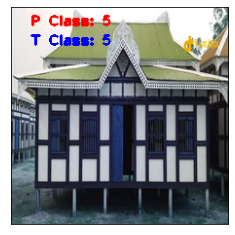

In [101]:
image_path='/content/drive/MyDrive/CSE 4000 Thesis/Dataset1500/Images/tinshed25.png'
random_image=cv2.imread(image_path)
random_image_rgb=cv2.cvtColor(random_image,cv2.COLOR_BGR2RGB)
texted_image =cv2.putText(random_image, text="T Class: 5", org=(20,40),fontFace=1, fontScale=1, color=(0,0,255), thickness=2)


random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))
texted_image =cv2.putText(texted_image, text="P Class: "+str(np.argmax(predicted_class)), org=(20,20),fontFace=1, fontScale=1, color=(255,0,0), thickness=2)
plt.xticks([])
plt.yticks([])
plt.imshow(texted_image)

(1, 224, 224, 3)
[[9.3989483e-09 1.2796700e-07 1.7775599e-10 1.9100904e-10 9.9999988e-01
  1.1832332e-08]]
4


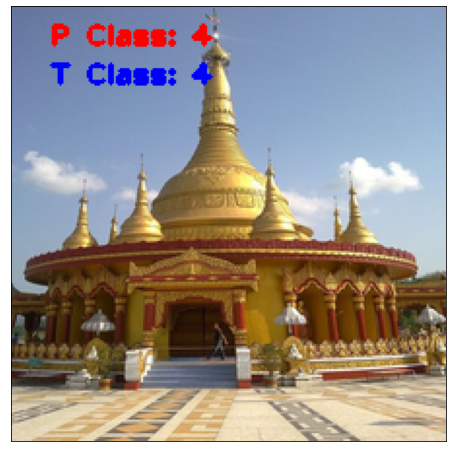

In [116]:
plt.figure(figsize=(8,8))
image_path='/content/drive/MyDrive/CSE 4000 Thesis/Dataset1500/Images/temple33.png'
random_image=image.load_img(image_path,target_size=(224,224))
random_image_bgr=cv2.imread(image_path)
random_image_rgb=cv2.cvtColor(random_image_bgr,cv2.COLOR_BGR2RGB)
texted_image =cv2.putText(random_image_rgb, text="T Class: 4", org=(20,40),fontFace=1, fontScale=1, color=(0,0,255), thickness=2)


random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))
texted_image =cv2.putText(texted_image, text="P Class: "+str(np.argmax(predicted_class)), org=(20,20),fontFace=1, fontScale=1, color=(255,0,0), thickness=2)
plt.xticks([])
plt.yticks([])
plt.imshow(texted_image)

(1, 224, 224, 3)
[[1.5430369e-06 9.7134084e-01 4.2758651e-13 1.2931436e-07 2.8657615e-02
  4.1297210e-09]]
1


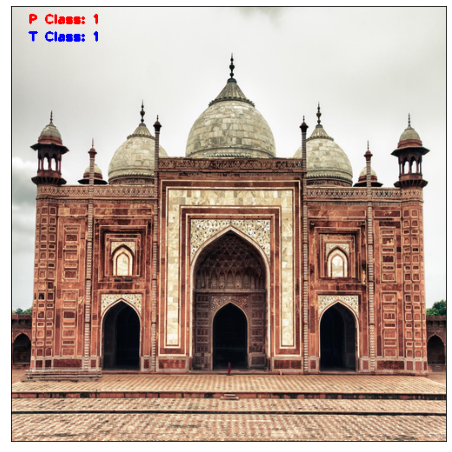

In [115]:
plt.figure(figsize=(8,8))
image_path='/content/drive/MyDrive/CSE 4000 Thesis/Dataset1500/Images/mosque35.png'
random_image=image.load_img(image_path,target_size=(224,224))
random_image_bgr=cv2.imread(image_path)
random_image_rgb=cv2.cvtColor(random_image_bgr,cv2.COLOR_BGR2RGB)
texted_image =cv2.putText(random_image_rgb, text="T Class: 1", org=(20,40),fontFace=1, fontScale=1, color=(0,0,255), thickness=2)


random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))
texted_image =cv2.putText(texted_image, text="P Class: "+str(np.argmax(predicted_class)), org=(20,20),fontFace=1, fontScale=1, color=(255,0,0), thickness=2)
plt.xticks([])
plt.yticks([])
plt.imshow(texted_image)

(1, 224, 224, 3)
[[2.4818568e-17 1.0000000e+00 8.6288824e-19 2.5919094e-18 4.5721122e-12
  1.5113357e-16]]
1


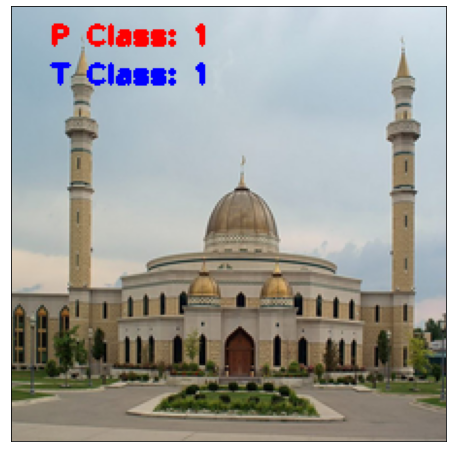

In [117]:
plt.figure(figsize=(8,8))
image_path='/content/drive/MyDrive/CSE 4000 Thesis/Dataset1500/Images/mosque0.png'
random_image=image.load_img(image_path,target_size=(224,224))
random_image_bgr=cv2.imread(image_path)
random_image_rgb=cv2.cvtColor(random_image_bgr,cv2.COLOR_BGR2RGB)
texted_image =cv2.putText(random_image_rgb, text="T Class: 1", org=(20,40),fontFace=1, fontScale=1, color=(0,0,255), thickness=2)


random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))
texted_image =cv2.putText(texted_image, text="P Class: "+str(np.argmax(predicted_class)), org=(20,20),fontFace=1, fontScale=1, color=(255,0,0), thickness=2)
plt.xticks([])
plt.yticks([])
plt.imshow(texted_image)

(1, 224, 224, 3)
[[7.6986481e-07 5.2731741e-07 1.3442185e-04 7.0864080e-06 1.4431235e-08
  9.9985719e-01]]
5


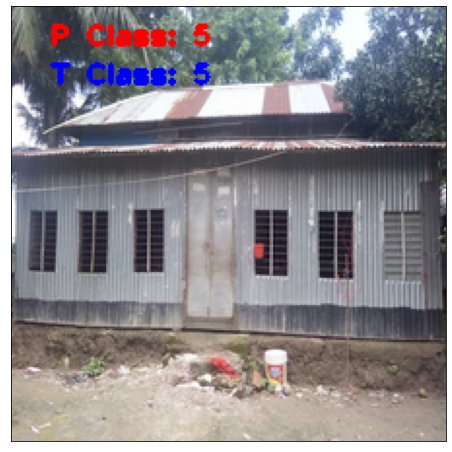

In [114]:
plt.figure(figsize=(8,8))
image_path='/content/drive/MyDrive/CSE 4000 Thesis/Dataset1500/Images/tinshed113.png'
random_image=image.load_img(image_path,target_size=(224,224))
random_image_bgr=cv2.imread(image_path)
random_image_rgb=cv2.cvtColor(random_image_bgr,cv2.COLOR_BGR2RGB)
texted_image =cv2.putText(random_image_rgb, text="T Class: 5", org=(20,40),fontFace=1, fontScale=1, color=(0,0,255), thickness=2)


random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))
texted_image =cv2.putText(texted_image, text="P Class: "+str(np.argmax(predicted_class)), org=(20,20),fontFace=1, fontScale=1, color=(255,0,0), thickness=2)
plt.xticks([])
plt.yticks([])

plt.imshow(texted_image)

## Save Model h5 format
This file includes
- Model architecture
- Model weight values during training
- model training config 
- optimizer 

In [74]:
import time
t = time.time()
export_path_keras = "/content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/CNN_model{}_time_{}.h5".format(test_accuracy,int(t))
print(export_path_keras)
model.save(export_path_keras)

/content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/CNN_model0.846666693687439_time_1625290209.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


## Reload the model h5 format

In [75]:
from tensorflow.keras.models import load_model

In [76]:
reload_model=load_model(export_path_keras)
reload_model.summary()

Model: "classifier"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 112, 112, 32) 896         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_9 (BatchNor (None, 112, 112, 32) 128         conv2d_5[0][0]                   
__________________________________________________________________________________________________
activation_9 (Activation)       (None, 112, 112, 32) 0           batch_normalization_9[0][0]      
_________________________________________________________________________________________

## Check Random Image

In [ ]:
image_batch,label_batch=next(iter(test_dataset))

In [ ]:
label_batch[:5]

In [ ]:
image_batch.shape

In [ ]:
label_batch.shape

In [ ]:
iter(test_dataset)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
test_dataset

## Classification report 

In [ ]:
predicted_result=model.predict(test_dataset)
predicted_result[:5]

In [ ]:
predicted_result.shape

In [ ]:
predicted_value=np.argmax(model.predict(test_dataset),axis=-1)
predicted_value

In [ ]:
test_value=test_dataset.classes
test_value

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ',accuracy_score(test_dataset.classes,predicted_value))

In [ ]:
from sklearn.metrics import classification_report
print('classification report \n',classification_report(test_dataset.classes,predicted_value))

## Another approach to calculate the classification report

In [ ]:
predicted_array=model.predict(validation_dataset)
predicted_array